## Binary Classification with Linear Regression

In this study I used the Bank Marketing dataset from the UCI Machine Learning Repository [[link here]](https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Business)

The purpose is to show we can use LinearRegression() to do simple cassification prediction with a small amount of code.

For Data preparation, I did the following:
1. Removed unwanted columns and make sure there is no NaN
2. Converted nonnumerical cloumns to numerical, e.g. loan and housing
3. most importantly, convert the y (campaing successful or not) to 0 and 1 according.

For modeling and prediction I did:
1. Built a LinearRegression model to predict the marketing campaign success probability
2. Created a prediction array/column by assigning 1 to it if the success probability >= 0.5, 0 otherwise.
3. Calculate the prediction accuracy by comparing the prediction to y

The accuracy is 0.89, which is good if not excellent.

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [368]:
df2 = pd.read_csv('data/bankNew.csv')

In [370]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [372]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [374]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [376]:
df2=df2.drop(columns = ['contact', 'poutcome', 'month', 'day', 'education', 'marital', 'job'])

In [378]:
df2.isna().sum()

age         0
default     0
balance     0
housing     0
loan        0
duration    0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [380]:
df3 = df2.copy()

In [382]:
df3['default'] = df2['default'].map({'no': 0, 'yes': 1})

In [384]:
df3

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,0,1787,no,no,79,1,-1,0,no
1,33,0,4789,yes,yes,220,1,339,4,no
2,35,0,1350,yes,no,185,1,330,1,no
3,30,0,1476,yes,yes,199,4,-1,0,no
4,59,0,0,yes,no,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,yes,no,329,5,-1,0,no
4517,57,1,-3313,yes,yes,153,1,-1,0,no
4518,57,0,295,no,no,151,11,-1,0,no
4519,28,0,1137,no,no,129,4,211,3,no


In [386]:
df2

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,no,1787,no,no,79,1,-1,0,no
1,33,no,4789,yes,yes,220,1,339,4,no
2,35,no,1350,yes,no,185,1,330,1,no
3,30,no,1476,yes,yes,199,4,-1,0,no
4,59,no,0,yes,no,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...
4516,33,no,-333,yes,no,329,5,-1,0,no
4517,57,yes,-3313,yes,yes,153,1,-1,0,no
4518,57,no,295,no,no,151,11,-1,0,no
4519,28,no,1137,no,no,129,4,211,3,no


In [388]:
df3['y'] = df2['y'].map({'no': 0, 'yes': 1})

In [390]:
df3

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,0,1787,no,no,79,1,-1,0,0
1,33,0,4789,yes,yes,220,1,339,4,0
2,35,0,1350,yes,no,185,1,330,1,0
3,30,0,1476,yes,yes,199,4,-1,0,0
4,59,0,0,yes,no,226,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,yes,no,329,5,-1,0,0
4517,57,1,-3313,yes,yes,153,1,-1,0,0
4518,57,0,295,no,no,151,11,-1,0,0
4519,28,0,1137,no,no,129,4,211,3,0


In [392]:
df3

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,0,1787,no,no,79,1,-1,0,0
1,33,0,4789,yes,yes,220,1,339,4,0
2,35,0,1350,yes,no,185,1,330,1,0
3,30,0,1476,yes,yes,199,4,-1,0,0
4,59,0,0,yes,no,226,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,yes,no,329,5,-1,0,0
4517,57,1,-3313,yes,yes,153,1,-1,0,0
4518,57,0,295,no,no,151,11,-1,0,0
4519,28,0,1137,no,no,129,4,211,3,0


In [394]:
df3['housing'] = df3['housing'].map({'no': 0, 'yes': 1})

In [396]:
df3['loan'] = df3['loan'].map({'no': 0, 'yes': 1})

In [398]:
df3

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,0,1787,0,0,79,1,-1,0,0
1,33,0,4789,1,1,220,1,339,4,0
2,35,0,1350,1,0,185,1,330,1,0
3,30,0,1476,1,1,199,4,-1,0,0
4,59,0,0,1,0,226,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,329,5,-1,0,0
4517,57,1,-3313,1,1,153,1,-1,0,0
4518,57,0,295,0,0,151,11,-1,0,0
4519,28,0,1137,0,0,129,4,211,3,0


Text(0.5, 1.0, '')

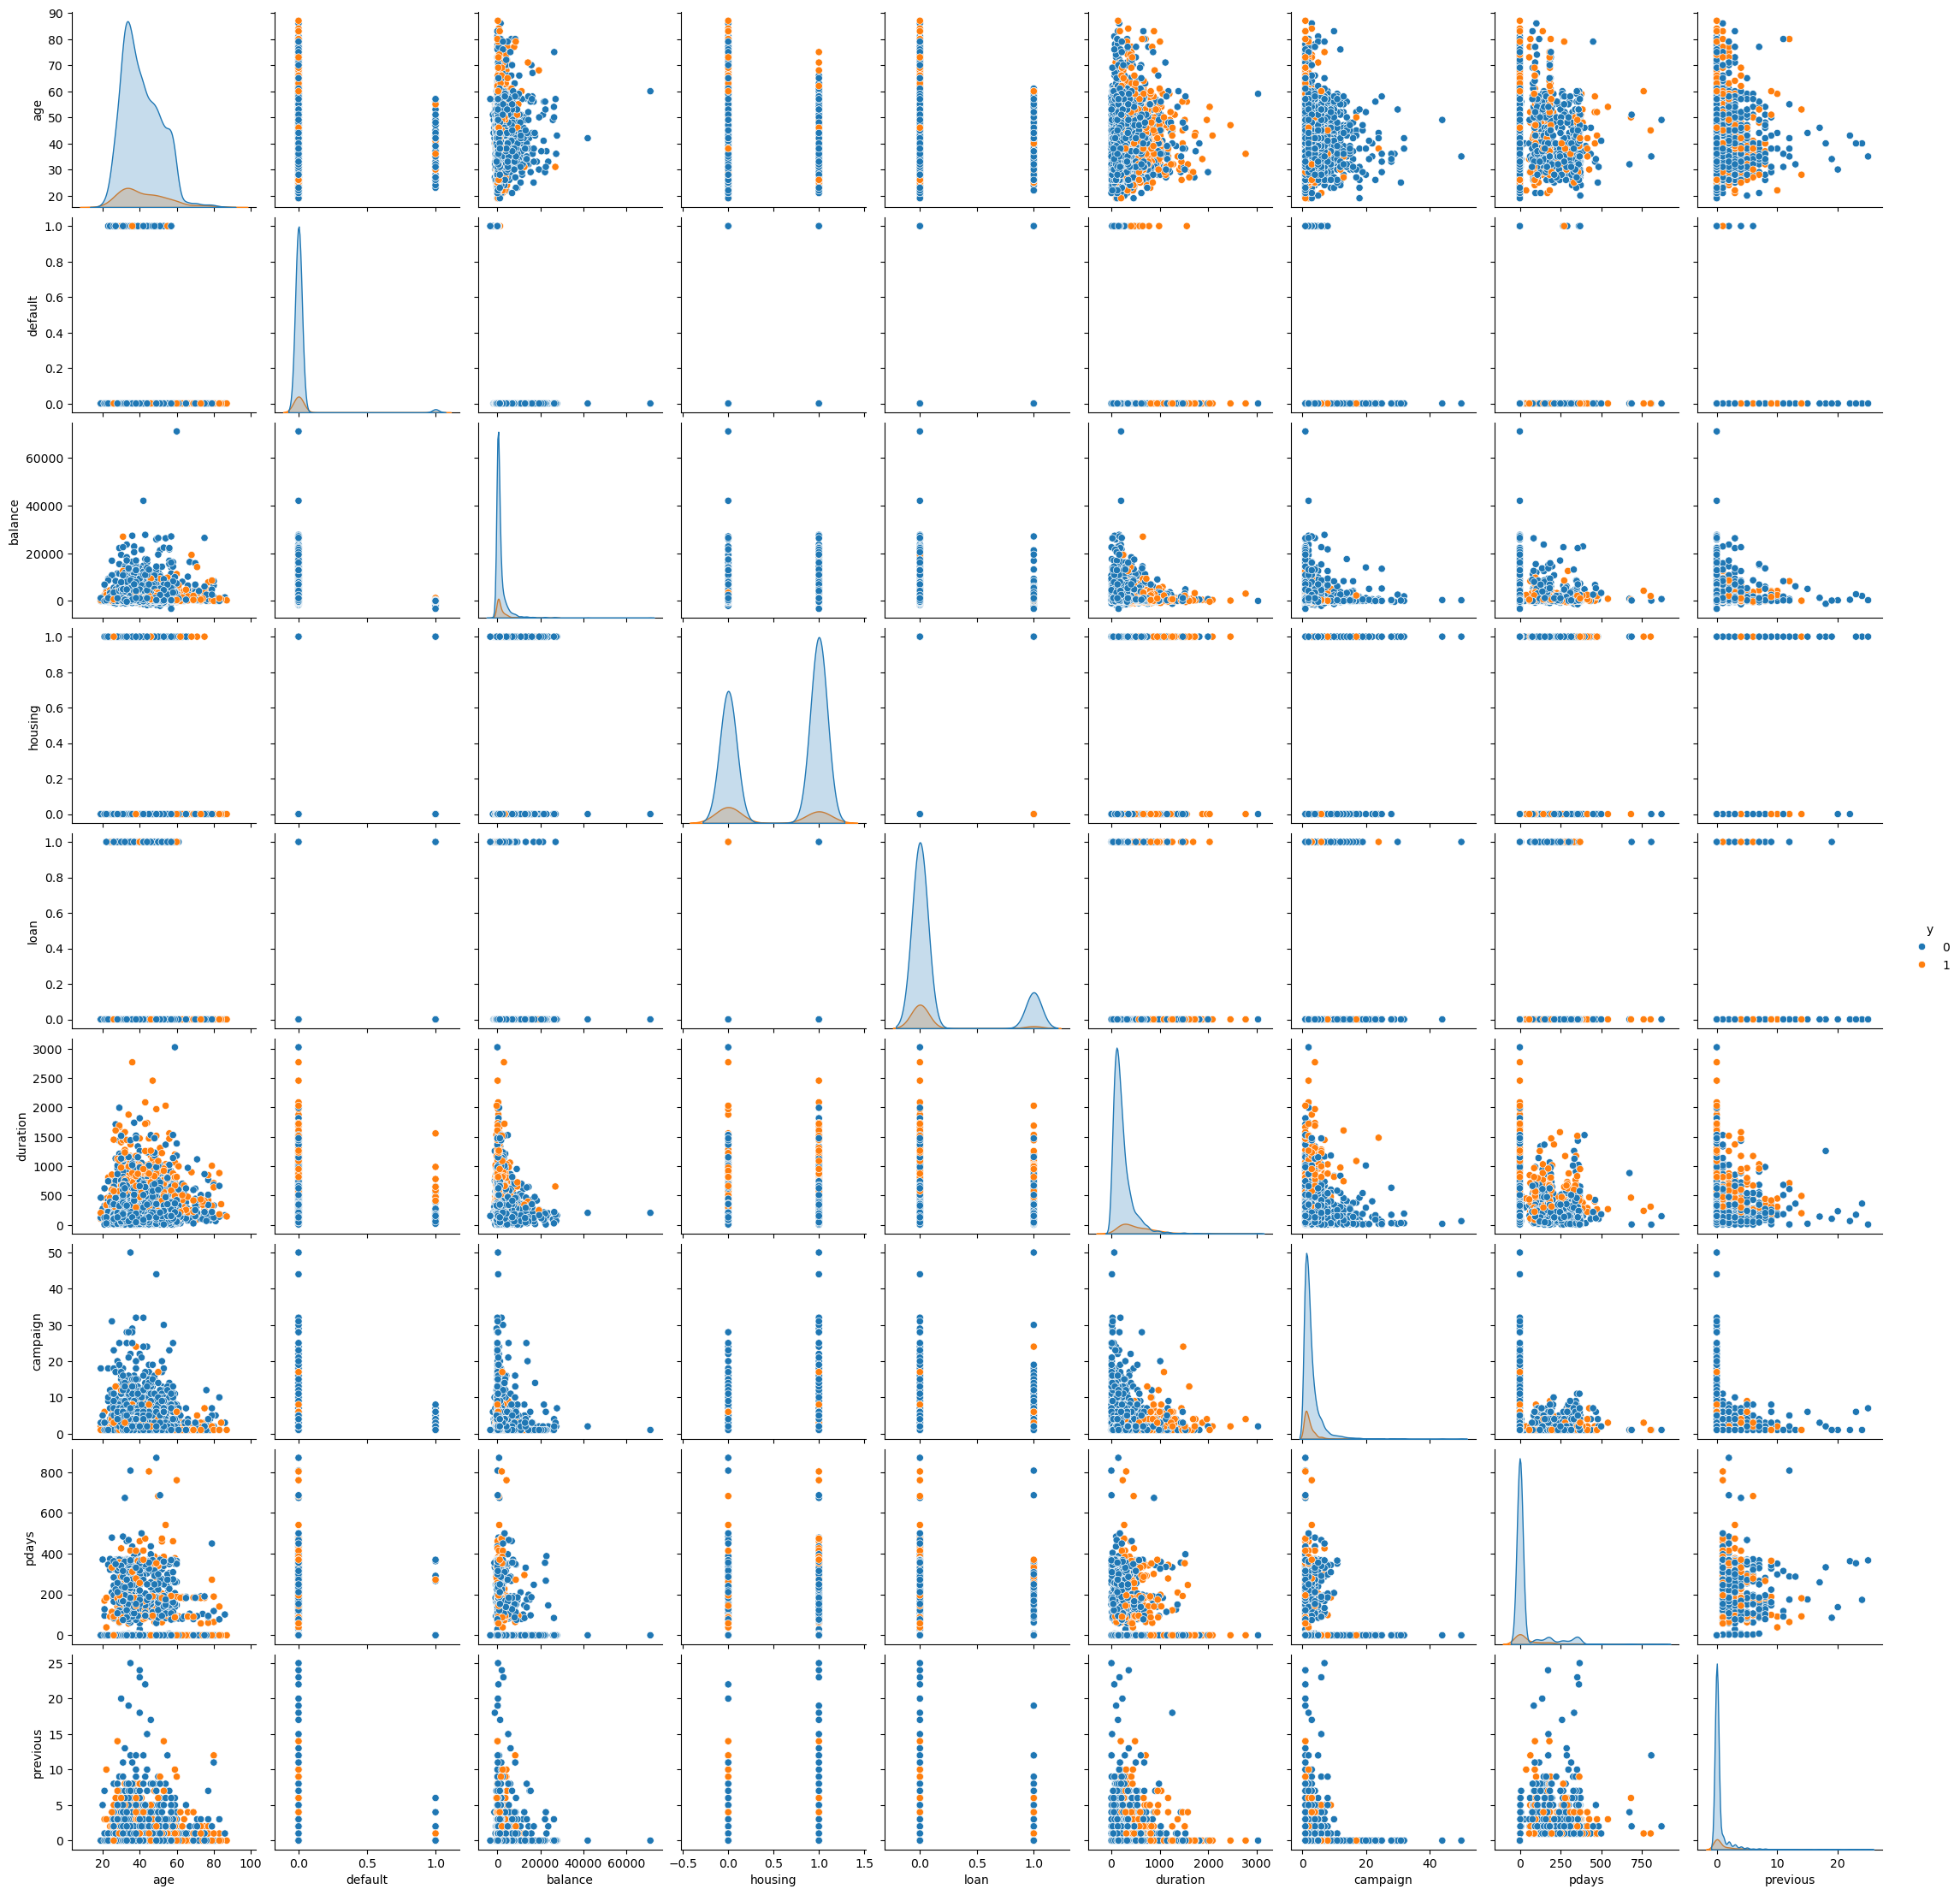

In [400]:
sns.pairplot(df3, hue = 'y');
plt.title('')

In [403]:
y = df3['y']

In [405]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [407]:
X = df3.drop(columns=['y'])

In [409]:
X

,age,default,balance,housing,loan,duration,campaign,pdays,previous
0,30,0,1787,0,0,79,1,-1,0
1,33,0,4789,1,1,220,1,339,4
2,35,0,1350,1,0,185,1,330,1
3,30,0,1476,1,1,199,4,-1,0
4,59,0,0,1,0,226,1,-1,0
...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,329,5,-1,0
4517,57,1,-3313,1,1,153,1,-1,0
4518,57,0,295,0,0,151,11,-1,0
4519,28,0,1137,0,0,129,4,211,3


In [411]:
marketing = LinearRegression().fit(X, y)

In [413]:
def linear_preds(X, threshold, model):
    preds = model.predict(X)
    preds[preds >= threshold] = 1
    preds[preds < threshold] = 0
    # print(preds[0:10])
    return preds

In [415]:
preds = linear_preds(X, 0.5, marketing)

In [417]:
marketing

LinearRegression()

In [419]:
linear_acc = (preds == y).mean()
linear_acc

0.8878566688785667